In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the datasets

train_data = pd.read_csv('data_in/train_data.csv')
test_data = pd.read_csv('data_in/test_data.csv')
print(train_data.head())


         date  product_identifier  department_identifier  \
0  2012-01-01                  74                     11   
1  2012-01-01                 337                     11   
2  2012-01-01                 423                     12   
3  2012-01-01                 432                     12   
4  2012-01-01                 581                     21   

          category_of_product  outlet        state  sales  
0                      others     111  Maharashtra      0  
1                      others     111  Maharashtra      1  
2                      others     111  Maharashtra      0  
3                      others     111  Maharashtra      0  
4  fast_moving_consumer_goods     111  Maharashtra      0  


In [3]:
#Auxilary datasets
product_prices = pd.read_csv('data_in/product_prices.csv')
date_week_map = pd.read_csv('data_in/date_to_week_id_map.csv')

print(product_prices.head())

   outlet  product_identifier  week_id  sell_price
0     111                  74       49        2.94
1     111                  74       50        2.94
2     111                  74       51        2.94
3     111                  74       52        2.94
4     111                  74       53        2.94


In [4]:
#sales is target attribute
#You are expected to create an analytical and forecasting framework to 
# predict the sales of the products based on the quantitative and 
# qualitative features provided in the datasets. 
# You may derive new features from the existing features and
# also from the domain knowledge, which may help in 
# improving the model efficiency

In [5]:
#data cleaning check data sanity
#merge main data and the required auxilary data
#EDA: Simple EDA's understand the category and state split 

In [6]:
print(train_data.shape)
print(product_prices.shape)
print(date_week_map.shape)

(395000, 7)
(59000, 4)
(821, 2)


In [7]:
#Merging the data sets

product_week_map = pd.merge(
    product_prices,
    date_week_map,
    on = ['week_id'],
    how = 'inner'
)

In [8]:
print(product_week_map.head())
print(product_week_map.shape)

   outlet  product_identifier  week_id  sell_price        date
0     111                  74       49        2.94  2012-01-01
1     111                  74       49        2.94  2012-01-02
2     111                  74       49        2.94  2012-01-03
3     111                  74       49        2.94  2012-01-04
4     111                  74       49        2.94  2012-01-05
(410500, 5)


In [9]:
train_data = pd.merge(train_data, product_week_map,
                      on = ['date','product_identifier','outlet'],
                      how = 'inner')

In [10]:
train_data.shape

(395000, 9)

In [11]:
train_data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [12]:
train_data.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [13]:
#check for null values
train_data.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [14]:
#we don't have any null values in the dataset 
#lets check first 5 and last 5 rows

In [15]:
train_data.head()


,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [16]:
train_data.tail()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98
394999,2014-02-28,3021,33,drinks_and_food,333,Kerala,0,161,2.08


In [17]:
train_data.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [18]:
##converting as category
col = ['category_of_product','state']
train_data[col] = train_data[col].astype('category')

In [19]:
train_data.dtypes

date                       object
product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                       int64
week_id                     int64
sell_price                float64
dtype: object

In [20]:
#train_data.to_csv('data_out/merged_train_data.csv', index=False)

In [21]:
#check the count of values in categorical cols

train_data.state.value_counts()

Maharashtra    158000
Kerala         118500
Telangana      118500
Name: state, dtype: int64

In [22]:
train_data.category_of_product.value_counts()

fast_moving_consumer_goods    229100
drinks_and_food               134300
others                         31600
Name: category_of_product, dtype: int64

In [23]:
train_data.outlet.value_counts()

331    39500
332    39500
333    39500
111    39500
112    39500
113    39500
114    39500
221    39500
222    39500
223    39500
Name: outlet, dtype: int64

In [24]:
train_data.department_identifier.value_counts()

22    134300
21     94800
33     94800
31     39500
11     15800
12     15800
Name: department_identifier, dtype: int64

In [25]:
train_data.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

<AxesSubplot:>

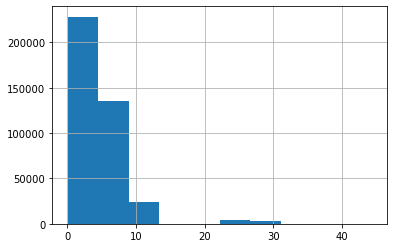

In [26]:
train_data.sell_price.hist()

<AxesSubplot:>

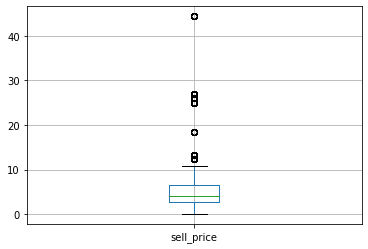

In [27]:
train_data.boxplot(column=['sell_price'])

In [28]:
#sales vs other variables scatter plots

def scatter(data, column):
    plt.figure()
    plt.scatter(data[column], data['sales'])
    plt.ylabel("Sales")
    plt.xlabel(column)
    plt.show()

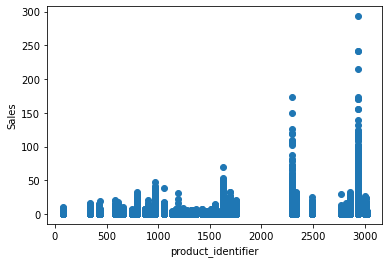

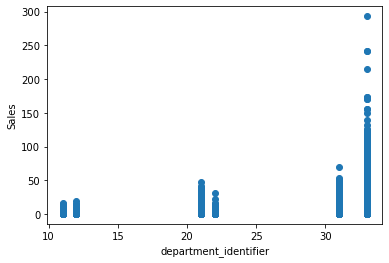

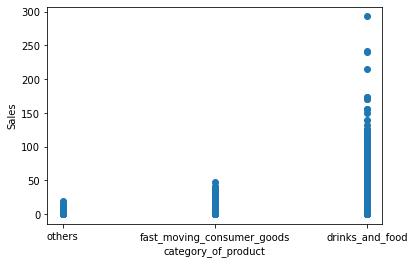

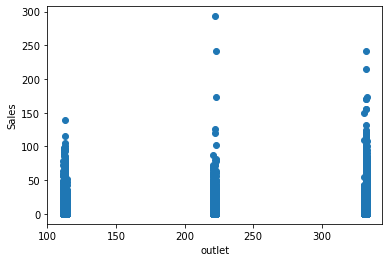

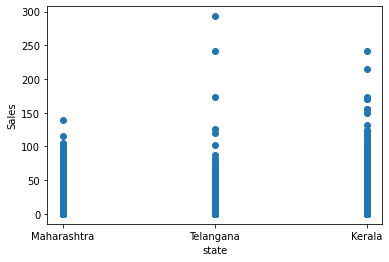

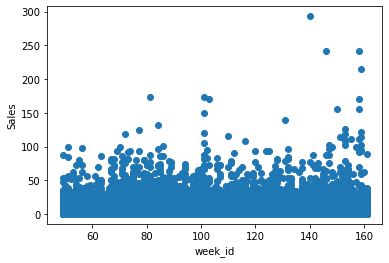

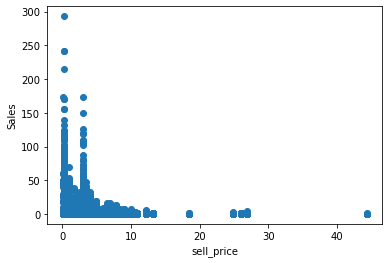

In [29]:
scatter(train_data,'product_identifier')
scatter(train_data,'department_identifier')
scatter(train_data, 'category_of_product')
scatter(train_data, 'outlet')
scatter(train_data, 'state')
scatter(train_data, 'week_id')
scatter(train_data, 'sell_price')

In [30]:
train_data.corr()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
product_identifier,1.000000e+00,9.099899e-01,2.286007e-17,0.152893,1.159105e-14,-0.201074
department_identifier,9.099899e-01,1.000000e+00,6.817693e-18,0.190038,-1.973939e-14,-0.302860
outlet,2.286007e-17,6.817693e-18,1.000000e+00,-0.021005,2.327934e-14,-0.000140
sales,1.528933e-01,1.900381e-01,-2.100456e-02,1.000000,-1.896909e-02,-0.198098
week_id,1.159105e-14,-1.973939e-14,2.327934e-14,-0.018969,1.000000e+00,0.004532
sell_price,-2.010739e-01,-3.028601e-01,-1.403172e-04,-0.198098,4.531863e-03,1.000000


<AxesSubplot:>

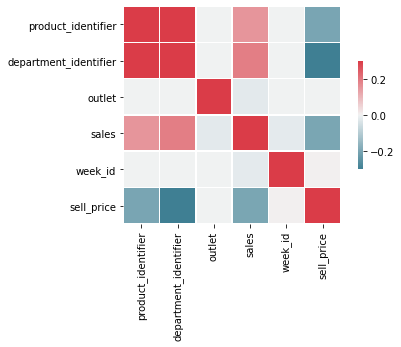

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_data.corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
train_data.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

In [33]:
#catgorical Variable
df_cat_col =train_data[['category_of_product','outlet','state']]

Graph for category_of_product: total = 3


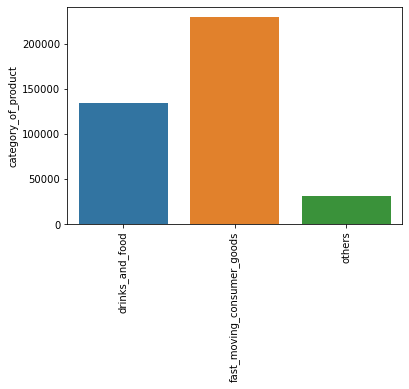

Graph for outlet: total = 10


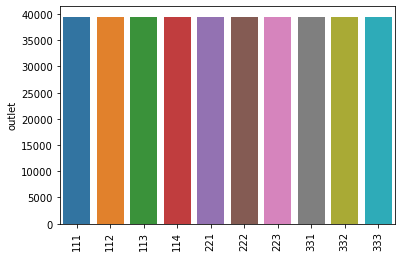

Graph for state: total = 3


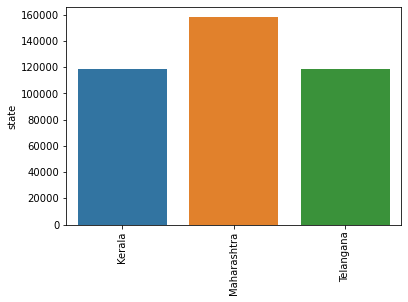

In [34]:
for i in df_cat_col.columns:
    cat_num = df_cat_col[i].value_counts()
    print('Graph for %s: total = %d'%(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [35]:
pd.pivot_table(train_data, 
               index = 'state', values='sales', aggfunc='sum')

,sales
state,
Kerala,141007
Maharashtra,214275
Telangana,130141


In [36]:
pd.pivot_table(train_data, 
               index = 'outlet', values='sales', aggfunc='sum')

,sales
outlet,
111,51916
112,50502
113,81644
114,30213
221,39562
222,52742
223,37837
331,37902
332,55983


In [37]:

pd.pivot_table(train_data, 
               index = 'product_identifier', values='sales', aggfunc='sum')

,sales
product_identifier,
74,4209
337,12377
423,2798
432,1430
581,12122
611,13383
631,5977
659,5629
743,2307


In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [38]:
pd.pivot_table(train_data, 
               index = ['outlet','department_identifier'], 
               values = 'sales', 
               aggfunc = 'sum').sort_values('outlet', ascending = False)


sales
outlet department_identifier       
333    33                     24773
       31                     10117
       22                      2422
       21                      7842
       12                       245
       11                      1723
332    33                     29529
       31                     11208
       22                      2808
       21                     10167
       12                       228
       11                      2043
331    21                      8191
       11                      2857
       12                       293
       31                     10580
       22                      2565
       33                     13416
223    33                     17893
       31                      5734
       22                      2724
       21                      9685
       12                       557
       11                      1244
222    12                       812
       33                     21693
       31                     11440
       22                      4206
       21                     13034
       11                      1557
221    31                      6236
       22                      2533
       21                     11321
       12                       415
       11                      1071
       33                     17986
114    33                     12530
       31                      7613
       22                      2141
       21                      6421
       12                       173
       11                      1335
113    22                      6397
       21                     21456
       11                      1613
       12                       659
       33                     37016
       31                     14503
112    33                     14124
       31                     14494
       22                      5667
       21                     14647
       12                       481
       11                      1089
111    22                      4083
       21                     12298
       12                       365
       31                     12891
       33                     20225
       11                      2054

In [39]:
#model building

train_data.columns
#creating a month column
train_data['Month'] = pd.to_datetime(train_data['date']).dt.month
train_data = train_data.drop(['date'],axis =1)

In [128]:
#splitting the dataset into train and test set
X = train_data.drop(['sales'],axis = 1)
y = train_data['sales']

In [129]:
from sklearn.preprocessing import LabelEncoder


X['state_encoded'] = LabelEncoder().fit_transform(X['state'])
X[['state','state_encoded']]

,state,state_encoded
0,Maharashtra,1
1,Maharashtra,1
2,Maharashtra,1
3,Maharashtra,1
4,Maharashtra,1
...,...,...
394995,Kerala,0
394996,Kerala,0
394997,Kerala,0
394998,Kerala,0


In [130]:
X['cat_product_encoded'] = LabelEncoder().fit_transform(X['category_of_product'])
X[['category_of_product','cat_product_encoded']]

,category_of_product,cat_product_encoded
0,others,2
1,others,2
2,others,2
3,others,2
4,fast_moving_consumer_goods,1
...,...,...
394995,drinks_and_food,0
394996,drinks_and_food,0
394997,drinks_and_food,0
394998,drinks_and_food,0


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state = 10)

In [132]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(276500, 10)
(276500,)
(118500, 10)
(118500,)


In [133]:
X_train = X_train.drop(['category_of_product', 'state','outlet','week_id',],axis = 1)
X_test = X_test.drop(['category_of_product', 'state','outlet','week_id'],axis = 1)

In [134]:
print(X_train.shape)

(276500, 6)


In [135]:
#cheking for multicollinearty

import statsmodels.api as sm
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        if (1-r_squared == 0):
            print(x_var_names[i])
            print(r_squared)
        
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

check_df=X_train
calculate_vif(check_df)

,Var,Vif
1,department_identifier,32.49
0,product_identifier,23.27
5,cat_product_encoded,4.09
3,Month,3.95
2,sell_price,3.03
4,state_encoded,2.67


In [139]:
#removing department_identifier and product_identifier

X_train = X_train.drop(['department_identifier','product_identifier'],axis = 1)
X_test = X_test.drop(['department_identifier','product_identifier'],axis = 1)

In [138]:
check_df=X_train
calculate_vif(check_df)

,Var,Vif
0,sell_price,2.63
3,cat_product_encoded,2.56
1,Month,2.50
2,state_encoded,2.11


In [142]:
#model building

#multiple linear regression

#using statsmodel
import statsmodels.api as sm
X_sm = X = sm.add_constant(X_train)
print(X_sm)
model = sm.OLS(y_train,X_sm)

model.fit().summary()

        const  sell_price  Month  state_encoded  cat_product_encoded
173006    1.0        6.97     12              1                    1
26143     1.0        6.48      2              1                    0
342286    1.0        2.24     11              2                    0
220444    1.0        3.98      3              0                    0
357455    1.0        2.84     12              0                    1
...       ...         ...    ...            ...                  ...
105595    1.0        2.98      7              1                    0
93553     1.0        4.97      7              1                    2
356879    1.0        5.94     12              0                    1
236669    1.0        5.94      4              1                    1
345353    1.0        4.97     11              0                    2

[276500 rows x 5 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     4455.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:33:03   Log-Likelihood:            -7.3120e+05
No. Observations:              276500   AIC:                         1.462e+06
Df Residuals:                  276495   BIC:                         1.462e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5746      0.018    139.832      0.000       2.539       2.611
sell_price             -0.1374      0.002    -77.927      0.000      -0.141      -0.134
Month                   0.0065      0.002      3.615      0.000       0.003       0.010
state_encoded          -0.0474      0.008     -5.669      0.000      -0.064      -0.031
cat_product_encoded    -0.8958      0.012    -77.830      0.000      -0.918      -0.873
==============================================================================
Omnibus:                   506332.910   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1887277115.707
Skew:                          13.277   Prob(JB):                         0.00
Kurtosis:                     406.868   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
#using sklearn linear model

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv = 3))


-1.5511526686838824